In [300]:
import torch, pickle, time, os, random
import numpy as np
import os.path as osp
import matplotlib.pyplot as plt
import torch_geometric as tg
from torch_geometric.loader import DataLoader
from tqdm import tqdm
from pysr import pysr, best
torch.manual_seed(42)
random.seed(42)

In [301]:
# Dataset
X = 2 * np.random.randn(100, 5)
y = 2 * np.cos(X[:, 3]) + X[:, 0] ** 2 - 2

# Learn equations
equations = pysr(
    X,
    y,
    niterations=5,
    binary_operators=["+", "*"],
    unary_operators=[
        "cos",  # Pre-defined library of operators (see docs)
        "inv(x) = 1/x",  # Define your own operator! (Julia syntax)
    ],
)

...# (you can use ctl-c to exit early)

print(best(equations))

Running on julia -O3 --threads 4 /var/folders/7n/5d661fr13pz2l_3q38y38nz80000gn/T/tmpycgffns_/runfile.jl
Started!

Cycles per second: 1.050e+04
Head worker occupation: 8.6%
Progress: 2 / 100 total iterations (2.000%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           2.674e+01  -0.000e+00  1.9801129
3           4.900e+00  8.486e-01  (x0 * x0)
5           1.994e+00  4.496e-01  ((x0 * x0) + -1.7047383)
7           1.956e+00  9.619e-03  (((x0 + 0.076069206) * x0) + -1.8636366)
8           5.621e-01  1.247e+00  ((cos(x3) + (x0 * x0)) + -1.5998564)
10          1.279e-11  1.225e+01  (((cos(x3) * 2.0000038) + (x0 * x0)) + -2.0000029)

Press 'q' and then <enter> to stop execution early.

Cycles per second: 8.520e+03
Head worker occupation: 3.4%
Progress: 4 / 100 total iterations (4.000%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           2.674e+01  -0.000e+00  1.9801527
3      


Cycles per second: 8.990e+03
Head worker occupation: 0.6%
Progress: 33 / 100 total iterations (33.000%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           2.674e+01  -0.000e+00  1.981082
3           4.900e+00  8.486e-01  (x0 * x0)
5           1.994e+00  4.496e-01  ((x0 * x0) + -1.704739)
7           1.918e+00  1.926e-02  (((x0 + 0.14372301) * x0) + -1.73358)
8           4.984e-01  1.348e+00  ((cos(x3) + (x0 * x0)) + -1.8523753)
10          1.279e-11  1.219e+01  (((cos(x3) * 2.0000038) + (x0 * x0)) + -2.0000029)

Press 'q' and then <enter> to stop execution early.

Cycles per second: 9.190e+03
Head worker occupation: 0.6%
Progress: 35 / 100 total iterations (35.000%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           2.674e+01  -0.000e+00  1.9803779
3           4.900e+00  8.486e-01  (x0 * x0)
5           1.994e+00  4.496e-01  ((x0 * x0) + -1.7047154)
7           1.918e+


Cycles per second: 1.130e+04
Head worker occupation: 0.4%
Progress: 64 / 100 total iterations (64.000%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           2.674e+01  -0.000e+00  1.9801153
3           4.900e+00  8.486e-01  (x0 * x0)
5           1.994e+00  4.496e-01  ((x0 * x0) + -1.7044591)
7           1.918e+00  1.926e-02  (((x0 + 0.14375512) * x0) + -1.7335354)
8           4.984e-01  1.348e+00  (cos(x3) + ((x0 * x0) + -1.8523812))
10          1.279e-11  1.219e+01  (((cos(x3) * 2.0000038) + (x0 * x0)) + -2.0000029)

Press 'q' and then <enter> to stop execution early.

Cycles per second: 1.140e+04
Head worker occupation: 0.4%
Progress: 67 / 100 total iterations (67.000%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           2.674e+01  -0.000e+00  1.9800217
3           4.900e+00  8.486e-01  (x0 * x0)
5           1.994e+00  4.496e-01  ((x0 * x0) + -1.7044799)
7           1.9


Cycles per second: 9.300e+03
Head worker occupation: 0.3%
Progress: 97 / 100 total iterations (97.000%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           2.674e+01  -0.000e+00  1.980088
3           4.900e+00  8.486e-01  (x0 * x0)
5           1.994e+00  4.496e-01  ((x0 * x0) + -1.7047392)
7           1.918e+00  1.926e-02  (((x0 + 0.1437978) * x0) + -1.7337584)
8           4.984e-01  1.348e+00  ((cos(x3) + (x0 * x0)) + -1.8523695)
10          1.279e-11  1.219e+01  (((cos(x3) * 2.0000038) + (x0 * x0)) + -2.0000029)

Press 'q' and then <enter> to stop execution early.
x0**2 + 2.0000038*cos(x3) - 2.0000029


In [177]:
datat=pickle.load(open('../../data.pkl', 'rb'))

In [178]:
from torch_geometric.data import Data
data=[]
for d in datat[::4]:
    data.append(Data(x=d.x[:,[0,3]], edge_index=d.edge_index, edge_attr=d.edge_attr, y=d.y[0]))

In [179]:
try:
    n_targ=len(data[0].y)
except:
    n_targ=1
n_feat=len(data[0].x[0])
n_feat, n_targ

(2, 1)

In [185]:
len(data)

27202

In [180]:
from torch import nn
class MLP(nn.Module):
    def __init__(self, n_in, n_out, hidden=128, nlayers=2, layer_norm=True):
        super().__init__()
        layers = [nn.Linear(n_in, hidden), nn.ReLU()]
        for i in range(nlayers):
            layers.append(nn.Linear(hidden, hidden))
            layers.append(nn.ReLU()) 
        if layer_norm:
            layers.append(nn.LayerNorm(hidden))
        layers.append(nn.Linear(hidden, n_out))
        self.mlp = nn.Sequential(*layers)

    def forward(self, x):
        return self.mlp(x)

In [181]:
from torch.nn import Linear, LayerNorm
from torch_geometric.nn import global_max_pool, global_add_pool


class GCN(torch.nn.Module):
    def __init__(self, hidden_channels, nlin=3):
        super(GCN, self).__init__()
        self.f = MLP(n_feat, 2, layer_norm=True)
        
#         self.f = MLP(hidden_channels, hidden_channels) 
    
        self.g = MLP(2, n_targ)
        
    def forward(self, x, edge_index, batch):
        # 1. Obtain node embeddings 
        x = self.f(x)
        
        
        x = global_add_pool(x, batch)
#         x = torch.cat([global_max_pool(x, batch),global_add_pool(x, batch)], 1)  ## Miles says use sumpool

        x = self.g(x)
#         x=self.lin1(x)
        return x
    
model = GCN(hidden_channels=128)
next(model.parameters()).is_cuda ##check number one

False

In [182]:
from sklearn.model_selection import train_test_split
criterion = torch.nn.MSELoss()
# criterion = torch.nn.L1Loss()
# criterion = torch.nn.SmoothL1Loss(beta=0.3)


n_epochs=25
n_trials=1
batch_size=256
split=0.8
# test_data=data[int(len(data)*split):]
# train_data=data[:int(len(data)*split)]
train_data, test_data=train_test_split(data, test_size=0.2)
l1_lambda = 5e-5
l2_lambda = 0

In [183]:
trains, tests, scatter = [], [], []
yss, preds=[],[]
model = GCN(hidden_channels=64)
train_loader=DataLoader(train_data, batch_size=batch_size, shuffle=1)

test_loader=DataLoader(test_data, batch_size=batch_size, shuffle=0)    
optimizer = torch.optim.Adam(model.parameters(), lr=0.003)
print('GPU ', next(model.parameters()).is_cuda)
# Initialize our train function
def train():
    model.train()
    
    for data in tqdm(train_loader, total=len(train_loader)): 
#         print('batch')
        out = model(data.x, data.edge_index, data.batch)  
        loss = criterion(out, data.y.view(-1,n_targ)) 
        l1_norm = sum(p.abs().sum() for p in model.parameters())
        l2_norm = sum(p.pow(2.0).sum() for p in model.parameters())


        loss = loss + l1_lambda * l1_norm + l2_lambda * l2_norm
        loss.backward()
        optimizer.step() 
        optimizer.zero_grad() 
#     print(loss, l1_norm*l1_lambda, l2_norm*l2_lambda)
 # test function

def test(loader): ##### transform back missing
    model.eval()
    outs = []
    ys = []
    with torch.no_grad(): ##this solves it!!!
        for dat in tqdm(loader, total=len(loader)): 
            
            out = model(dat.x, dat.edge_index, dat.batch) 
            ys.append(dat.y.view(-1,n_targ))
            outs.append(out)
    outss=torch.vstack(outs)
    yss=torch.vstack(ys)
    return torch.std(outss - yss, axis=0), outss, yss

GPU  False


In [187]:
#this uses about 1 GB of memory on the GPU
tr_acc, te_acc = [], []
start=time.time()
for epoch in range(n_epochs):
    print(epoch)
    train()
    if (epoch+1)%2==0:
        train_acc, _ , _ = test(train_loader)
        test_acc, _ , _ = test(test_loader)
        tr_acc.append(train_acc.cpu())
        te_acc.append(test_acc.cpu())
        print(f'Epoch: {epoch+1:03d}, Train scatter: {np.round(train_acc.cpu().numpy(), 4)} \n \
        Test scatter: {np.round(test_acc.cpu().numpy(), 4)}')
stop=time.time()
spent=stop-start
print(f"{spent:.2f} seconds spent training, {spent/n_epochs:.3f} seconds per epoch. Processed {len(data)*split*n_epochs/spent:.0f} trees per second")


  0%|          | 0/86 [00:00<?, ?it/s]

0


  0%|          | 0/86 [00:00<?, ?it/s]

1


  0%|          | 0/86 [00:00<?, ?it/s]

Epoch: 002, Train scatter: [0.1712] 
         Test scatter: [0.1799]
2


  0%|          | 0/86 [00:00<?, ?it/s]

3


  0%|          | 0/86 [00:00<?, ?it/s]

Epoch: 004, Train scatter: [0.1751] 
         Test scatter: [0.1827]
4


  0%|          | 0/86 [00:00<?, ?it/s]

5


  0%|          | 0/86 [00:00<?, ?it/s]

Epoch: 006, Train scatter: [0.1504] 
         Test scatter: [0.1611]
6


  0%|          | 0/86 [00:00<?, ?it/s]

7


  0%|          | 0/86 [00:00<?, ?it/s]

Epoch: 008, Train scatter: [0.1363] 
         Test scatter: [0.1465]
8


  9%|▉         | 8/86 [00:03<00:38,  2.02it/s]

KeyboardInterrupt



In [188]:
sum(p.abs().sum() for p in model.f.parameters())/sum(p.numel() for p in model.f.parameters())*100

tensor(1.3220, grad_fn=<MulBackward0>)

In [189]:
sum(p.abs().sum() for p in model.g.parameters())/sum(p.numel() for p in model.g.parameters())*100

tensor(0.9559, grad_fn=<MulBackward0>)

In [260]:
y_f = []
x_f = []
y_g = []
y_t = []
batch = []
for dat in test_loader:
#     y_f.append(model.f(dat.x).detach().numpy())
#     y_g.append(model(dat.x, dat.edge_index, dat.batch).detach().numpy())
    x_f.append(dat.x.detach().numpy())
    batch.append(dat.batch.detach().numpy())
    y_t.append(dat.y.detach().numpy())

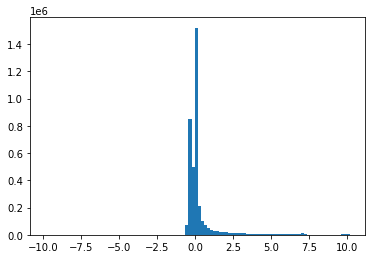

In [191]:
plt.hist(np.vstack(y_f).flatten(), bins=100);

In [192]:
N=25
vals, counts = np.unique(batch[0], return_counts=1)
l = np.cumsum(counts)[N-1]
x_f_pysr=np.vstack(x_f[0][:l])
y_f_pysr=np.vstack(y_f[0][:l])
y_g_pysr=np.vstack(y_g[0][:N])

b_pysr = batch[0][:l]

In [199]:
y2_i_equations = pysr(
    X=x_f_pysr, y=y_f_pysr,
    procs=4,
    niterations=20,
    populations=12,
    useFrequency=True,
    multithreading=True, 
    binary_operators=["plus", "sub", "mult", "div"],
    unary_operators = ['log10_abs', 'neg', 'sqrt_abs'],
    batching=1, 
    batchSize=250,
    maxsize=10
)

Running on julia -O3 --threads 4 /var/folders/7n/5d661fr13pz2l_3q38y38nz80000gn/T/tmpprghkdpv/runfile.jl
Started!

Cycles per second: 1.430e+03
Head worker occupation: 2.2%
Progress: 1 / 480 total iterations (0.208%)
Best equations for output 1
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           1.011e+00  9.531e-01  x1
3           5.330e-01  3.199e-01  (x1 * x1)
4           5.171e-01  3.030e-02  (sqrt_abs(x1) * x1)
5           3.755e-01  3.198e-01  ((x1 - -0.3906263) * x1)
6           1.914e-01  6.740e-01  (sqrt_abs(x1 * x1) * x1)
7           1.582e-01  1.906e-01  ((x1 - -0.96683574) * (x1 - 0.49051252))

Best equations for output 2
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation

Press 'q' and then <enter> to stop execution early.

Cycles per second: 5.300e+03
Head worker occupation: 1.9%
Progress: 3 / 480 total iterations (0.625%)
Best equations for output 1
Hall of Fame:
----


Cycles per second: 6.690e+03
Head worker occupation: 0.9%
Progress: 15 / 480 total iterations (3.125%)
Best equations for output 1
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           1.011e+00  9.531e-01  x1
3           5.330e-01  3.199e-01  (x1 * x1)
4           5.171e-01  3.030e-02  (x1 * sqrt_abs(x1))
5           3.755e-01  3.198e-01  ((x1 + 0.39078617) * x1)
6           2.738e-01  3.161e-01  (x1 * sqrt_abs(1.1785032 + x1))
7           1.582e-01  5.485e-01  (((x1 - -0.47630757) * x1) + -0.47425908)

Best equations for output 2
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           6.500e-01  1.192e-07  0.23609711
3           4.609e-01  1.718e-01  (0.4870774 * x1)
4           4.341e-01  5.990e-02  (x1 * log10_abs(x1))
5           2.617e-01  5.061e-01  ((x1 * x1) * 0.3996181)
6           1.608e-01  4.869e-01  ((x1 * x1) * log10_abs(x1))

Press 'q' and then <enter> to stop 


Cycles per second: 8.330e+03
Head worker occupation: 0.6%
Progress: 31 / 480 total iterations (6.458%)
Best equations for output 1
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           1.011e+00  9.531e-01  x1
3           5.330e-01  3.199e-01  (x1 * x1)
4           5.171e-01  3.030e-02  (x1 * sqrt_abs(x1))
5           3.755e-01  3.198e-01  (x1 * (x1 + 0.3906194))
6           2.738e-01  3.161e-01  (x1 * sqrt_abs(1.1785444 + x1))
7           1.582e-01  5.485e-01  ((x1 * (x1 - -0.47632545)) - 0.47426617)

Best equations for output 2
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           6.500e-01  1.192e-07  0.23609711
3           4.609e-01  1.718e-01  (0.4870774 * x1)
4           4.341e-01  5.990e-02  (x1 * log10_abs(x1))
5           2.617e-01  5.061e-01  ((x1 * x1) * 0.3996181)
6           1.608e-01  4.869e-01  ((x1 * x1) * log10_abs(x1))

Press 'q' and then <enter> to stop ex


Cycles per second: 8.060e+03
Head worker occupation: 0.5%
Progress: 46 / 480 total iterations (9.583%)
Best equations for output 1
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           1.011e+00  9.531e-01  x1
3           5.330e-01  3.199e-01  (x1 * x1)
4           5.171e-01  3.030e-02  (x1 * sqrt_abs(x1))
5           3.755e-01  3.198e-01  (x1 * (x1 - -0.39062595))
6           1.914e-01  6.740e-01  (x1 * sqrt_abs(x1 * x1))
7           1.582e-01  1.906e-01  ((x1 * (x1 - -0.47628278)) - 0.47426412)

Best equations for output 2
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           6.500e-01  1.192e-07  0.23609711
3           4.609e-01  1.718e-01  (0.4870774 * x1)
4           4.341e-01  5.990e-02  (x1 * log10_abs(x1))
5           2.617e-01  5.061e-01  ((x1 * x1) * 0.3996181)
6           1.608e-01  4.869e-01  ((x1 * x1) * log10_abs(x1))

Press 'q' and then <enter> to stop executi


Cycles per second: 7.800e+03
Head worker occupation: 0.4%
Progress: 60 / 480 total iterations (12.500%)
Best equations for output 1
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           1.011e+00  9.531e-01  x1
3           5.330e-01  3.199e-01  (x1 * x1)
4           5.171e-01  3.030e-02  (sqrt_abs(x1) * x1)
5           3.755e-01  3.198e-01  ((x1 + 0.39062482) * x1)
6           1.914e-01  6.740e-01  (x1 * sqrt_abs(x1 * x1))
7           1.582e-01  1.906e-01  (((x1 + 0.4763089) * x1) - 0.47426742)

Best equations for output 2
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           6.500e-01  1.192e-07  0.23609711
3           4.609e-01  1.718e-01  (0.4870774 * x1)
4           4.341e-01  5.990e-02  (x1 * log10_abs(x1))
5           2.617e-01  5.061e-01  ((x1 * x1) * 0.3996181)
6           1.608e-01  4.869e-01  ((x1 * x1) * log10_abs(x1))

Press 'q' and then <enter> to stop execution


Cycles per second: 7.180e+03
Head worker occupation: 0.3%
Progress: 72 / 480 total iterations (15.000%)
Best equations for output 1
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           1.011e+00  9.531e-01  x1
3           5.330e-01  3.199e-01  (x1 * x1)
4           5.171e-01  3.030e-02  (x1 * sqrt_abs(x1))
5           3.755e-01  3.198e-01  (x1 * (x1 - -0.39063036))
6           1.914e-01  6.740e-01  (x1 * sqrt_abs(x1 * x1))
7           1.582e-01  1.906e-01  ((x1 * (x1 - -0.47625622)) - 0.47430083)

Best equations for output 2
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           6.500e-01  1.192e-07  0.23609711
3           4.609e-01  1.718e-01  (0.4870774 * x1)
4           4.341e-01  5.990e-02  (x1 * log10_abs(x1))
5           2.617e-01  5.061e-01  ((x1 * x1) * 0.3996181)
6           1.608e-01  4.869e-01  ((x1 * x1) * log10_abs(x1))

Press 'q' and then <enter> to stop execut


Cycles per second: 6.750e+03
Head worker occupation: 0.3%
Progress: 83 / 480 total iterations (17.292%)
Best equations for output 1
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           1.011e+00  9.531e-01  x1
3           5.330e-01  3.199e-01  (x1 * x1)
4           5.171e-01  3.030e-02  (sqrt_abs(x1) * x1)
5           3.755e-01  3.198e-01  ((x1 + 0.39062566) * x1)
6           1.914e-01  6.740e-01  (x1 * sqrt_abs(x1 * x1))
7           1.582e-01  1.906e-01  (((x1 + 0.4763206) * x1) - 0.4742639)

Best equations for output 2
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           6.500e-01  1.192e-07  0.23609711
3           4.609e-01  1.718e-01  (0.4870774 * x1)
4           4.341e-01  5.990e-02  (x1 * log10_abs(x1))
5           2.617e-01  5.061e-01  ((x1 * x1) * 0.3996181)
6           1.608e-01  4.869e-01  ((x1 * x1) * log10_abs(x1))

Press 'q' and then <enter> to stop execution 


Cycles per second: 6.090e+03
Head worker occupation: 0.3%
Progress: 94 / 480 total iterations (19.583%)
Best equations for output 1
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           1.011e+00  9.531e-01  x1
3           5.330e-01  3.199e-01  (x1 * x1)
4           5.171e-01  3.030e-02  (sqrt_abs(x1) * x1)
5           3.755e-01  3.198e-01  (x1 * (x1 - -0.39062995))
6           1.914e-01  6.740e-01  (sqrt_abs(x1 * x1) * x1)
7           1.582e-01  1.906e-01  ((x1 * (x1 - -0.4763054)) - 0.47425836)

Best equations for output 2
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           6.500e-01  1.192e-07  0.23609711
3           4.609e-01  1.718e-01  (0.4870774 * x1)
4           4.341e-01  5.990e-02  (x1 * log10_abs(x1))
5           2.617e-01  5.061e-01  ((x1 * x1) * 0.3996181)
6           1.608e-01  4.869e-01  ((x1 * x1) * log10_abs(x1))

Press 'q' and then <enter> to stop executi


Cycles per second: 7.130e+03
Head worker occupation: 0.2%
Progress: 108 / 480 total iterations (22.500%)
Best equations for output 1
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           1.011e+00  9.531e-01  x1
3           5.330e-01  3.199e-01  (x1 * x1)
4           5.171e-01  3.030e-02  (x1 * sqrt_abs(x1))
5           3.923e-01  2.762e-01  ((x1 * x1) - 0.47425815)
6           1.914e-01  7.176e-01  (x1 * sqrt_abs(x1 * x1))

Best equations for output 2
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           6.500e-01  1.192e-07  0.23609711
3           4.609e-01  1.718e-01  (0.4870774 * x1)
4           4.341e-01  5.990e-02  (x1 * log10_abs(x1))
5           2.617e-01  5.061e-01  ((x1 * x1) * 0.3996181)
6           1.608e-01  4.869e-01  ((x1 * x1) * log10_abs(x1))

Press 'q' and then <enter> to stop execution early.

Cycles per second: 7.890e+03
Head worker occupation: 0.2%
Progr


Cycles per second: 9.040e+03
Head worker occupation: 0.2%
Progress: 129 / 480 total iterations (26.875%)
Best equations for output 1
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           1.011e+00  9.531e-01  x1
3           5.330e-01  3.199e-01  (x1 * x1)
4           5.171e-01  3.030e-02  (x1 * sqrt_abs(x1))
5           3.755e-01  3.198e-01  (x1 * (x1 - -0.39063066))
6           3.684e-01  1.923e-02  (x1 * sqrt_abs(x1 - -0.47630322))
7           1.582e-01  8.453e-01  ((x1 * (x1 - -0.47631177)) - 0.47427762)

Best equations for output 2
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           6.500e-01  1.192e-07  0.23609711
3           4.609e-01  1.718e-01  (0.4870774 * x1)
4           4.341e-01  5.990e-02  (x1 * log10_abs(x1))
5           2.617e-01  5.061e-01  ((x1 * x1) * 0.3996181)
6           1.608e-01  4.869e-01  ((x1 * x1) * log10_abs(x1))

Press 'q' and then <enter> to s


Cycles per second: 8.920e+03
Head worker occupation: 0.2%
Progress: 143 / 480 total iterations (29.792%)
Best equations for output 1
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           1.011e+00  9.531e-01  x1
3           5.330e-01  3.199e-01  (x1 * x1)
4           5.171e-01  3.030e-02  (x1 * sqrt_abs(x1))
5           3.923e-01  2.762e-01  ((x1 * x1) - 0.47426006)
6           1.914e-01  7.176e-01  (x1 * sqrt_abs(x1 * x1))
7           1.582e-01  1.906e-01  ((x1 * (x1 - -0.47631285)) - 0.47427905)

Best equations for output 2
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           6.500e-01  1.192e-07  0.23609711
3           4.609e-01  1.718e-01  (0.4870774 * x1)
4           4.341e-01  5.990e-02  (x1 * log10_abs(x1))
5           2.617e-01  5.061e-01  ((x1 * x1) * 0.3996181)
6           1.608e-01  4.869e-01  ((x1 * x1) * log10_abs(x1))

Press 'q' and then <enter> to stop execut


Cycles per second: 9.270e+03
Head worker occupation: 0.2%
Progress: 163 / 480 total iterations (33.958%)
Best equations for output 1
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           1.011e+00  9.531e-01  x1
3           5.330e-01  3.199e-01  (x1 * x1)
4           5.171e-01  3.030e-02  (x1 * sqrt_abs(x1))
5           3.755e-01  3.198e-01  ((x1 + 0.3906245) * x1)
6           1.914e-01  6.740e-01  (x1 * sqrt_abs(x1 * x1))
7           1.582e-01  1.906e-01  ((x1 * (x1 - -0.47631556)) - 0.47428477)

Best equations for output 2
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           6.500e-01  1.192e-07  0.23609711
3           4.609e-01  1.718e-01  (0.4870774 * x1)
4           4.341e-01  5.990e-02  (x1 * log10_abs(x1))
5           2.617e-01  5.061e-01  ((x1 * x1) * 0.3996181)
6           1.608e-01  4.869e-01  ((x1 * x1) * log10_abs(x1))

Press 'q' and then <enter> to stop executi


Cycles per second: 8.240e+03
Head worker occupation: 0.2%
Progress: 177 / 480 total iterations (36.875%)
Best equations for output 1
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           1.011e+00  9.531e-01  x1
3           5.330e-01  3.199e-01  (x1 * x1)
4           5.171e-01  3.030e-02  (x1 * sqrt_abs(x1))
5           3.755e-01  3.198e-01  ((x1 + 0.39076573) * x1)
6           1.914e-01  6.740e-01  (x1 * sqrt_abs(x1 * x1))
7           1.582e-01  1.906e-01  ((x1 * (x1 - -0.47630867)) - 0.47426808)

Best equations for output 2
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           6.500e-01  1.192e-07  0.23609711
3           4.609e-01  1.718e-01  (0.4870774 * x1)
4           4.341e-01  5.990e-02  (x1 * log10_abs(x1))
5           2.617e-01  5.061e-01  ((x1 * x1) * 0.3996181)
6           1.608e-01  4.869e-01  ((x1 * x1) * log10_abs(x1))

Press 'q' and then <enter> to stop execut


Cycles per second: 6.680e+03
Head worker occupation: 0.2%
Progress: 191 / 480 total iterations (39.792%)
Best equations for output 1
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           1.011e+00  9.531e-01  x1
3           5.330e-01  3.199e-01  (x1 * x1)
4           5.171e-01  3.030e-02  (x1 * sqrt_abs(x1))
5           3.755e-01  3.198e-01  ((x1 + 0.390629) * x1)
6           1.914e-01  6.740e-01  (x1 * sqrt_abs(x1 * x1))
7           1.582e-01  1.906e-01  (((x1 + 0.47630537) * x1) - 0.47425815)

Best equations for output 2
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           6.500e-01  1.192e-07  0.23609711
3           4.609e-01  1.718e-01  (0.4870774 * x1)
4           4.341e-01  5.990e-02  (x1 * log10_abs(x1))
5           2.617e-01  5.061e-01  ((x1 * x1) * 0.3996181)
6           1.608e-01  4.869e-01  ((x1 * x1) * log10_abs(x1))

Press 'q' and then <enter> to stop execution


Cycles per second: 6.510e+03
Head worker occupation: 0.2%
Progress: 204 / 480 total iterations (42.500%)
Best equations for output 1
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           1.011e+00  9.531e-01  x1
3           5.330e-01  3.199e-01  (x1 * x1)
4           5.171e-01  3.030e-02  (x1 * sqrt_abs(x1))
5           3.755e-01  3.198e-01  (x1 * (x1 - -0.3906264))
6           1.914e-01  6.740e-01  (x1 * sqrt_abs(x1 * x1))
7           1.582e-01  1.906e-01  (((x1 + 0.4763208) * x1) - 0.47426435)

Best equations for output 2
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           6.500e-01  1.192e-07  0.23609711
3           4.609e-01  1.718e-01  (0.4870774 * x1)
4           4.341e-01  5.990e-02  (x1 * log10_abs(x1))
5           2.617e-01  5.061e-01  ((x1 * x1) * 0.3996181)
6           1.608e-01  4.869e-01  ((x1 * x1) * log10_abs(x1))

Press 'q' and then <enter> to stop executio


Cycles per second: 6.690e+03
Head worker occupation: 0.2%
Progress: 220 / 480 total iterations (45.833%)
Best equations for output 1
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           1.011e+00  9.531e-01  x1
3           5.330e-01  3.199e-01  (x1 * x1)
4           5.171e-01  3.030e-02  (x1 * sqrt_abs(x1))
5           3.755e-01  3.198e-01  ((x1 + 0.3906222) * x1)
6           1.914e-01  6.740e-01  (x1 * sqrt_abs(x1 * x1))
7           1.582e-01  1.906e-01  (((x1 + 0.4763206) * x1) - 0.4742639)

Best equations for output 2
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           6.500e-01  1.192e-07  0.23609711
3           4.609e-01  1.718e-01  (0.4870774 * x1)
4           4.341e-01  5.990e-02  (x1 * log10_abs(x1))
5           2.617e-01  5.061e-01  ((x1 * x1) * 0.3996181)
6           1.608e-01  4.869e-01  ((x1 * x1) * log10_abs(x1))

Press 'q' and then <enter> to stop execution 


Cycles per second: 6.310e+03
Head worker occupation: 0.2%
Progress: 232 / 480 total iterations (48.333%)
Best equations for output 1
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           1.011e+00  9.531e-01  x1
3           5.330e-01  3.199e-01  (x1 * x1)
4           5.171e-01  3.030e-02  (x1 * sqrt_abs(x1))
5           3.755e-01  3.198e-01  ((x1 + 0.39062166) * x1)
6           1.914e-01  6.740e-01  (x1 * sqrt_abs(x1 * x1))
7           1.582e-01  1.906e-01  (((x1 + 0.47631365) * x1) + -0.47426146)

Best equations for output 2
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           6.500e-01  1.192e-07  0.23609711
3           4.609e-01  1.718e-01  (0.4870774 * x1)
4           4.341e-01  5.990e-02  (x1 * log10_abs(x1))
5           2.617e-01  5.061e-01  ((x1 * x1) * 0.3996181)
6           1.608e-01  4.869e-01  ((x1 * x1) * log10_abs(x1))

Press 'q' and then <enter> to stop execut


Cycles per second: 7.920e+03
Head worker occupation: 0.2%
Progress: 251 / 480 total iterations (52.292%)
Best equations for output 1
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           1.011e+00  9.531e-01  x1
3           5.330e-01  3.199e-01  (x1 * x1)
4           5.171e-01  3.030e-02  (x1 * sqrt_abs(x1))
5           3.755e-01  3.198e-01  ((x1 + 0.3906257) * x1)
6           2.738e-01  3.161e-01  (x1 * sqrt_abs(1.1785604 + x1))
7           1.582e-01  5.485e-01  (((x1 + 0.4763096) * x1) - 0.47427243)

Best equations for output 2
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           6.500e-01  1.192e-07  0.23609711
3           4.609e-01  1.718e-01  (0.4870774 * x1)
4           4.341e-01  5.990e-02  (x1 * log10_abs(x1))
5           2.617e-01  5.061e-01  ((x1 * x1) * 0.3996181)
6           1.608e-01  4.869e-01  ((x1 * x1) * log10_abs(x1))

Press 'q' and then <enter> to stop ex


Cycles per second: 7.400e+03
Head worker occupation: 0.2%
Progress: 264 / 480 total iterations (55.000%)
Best equations for output 1
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           1.011e+00  9.531e-01  x1
3           5.330e-01  3.199e-01  (x1 * x1)
4           5.171e-01  3.030e-02  (sqrt_abs(x1) * x1)
5           3.755e-01  3.198e-01  (x1 * (x1 - -0.39063066))
6           3.206e-01  1.583e-01  (sqrt_abs(x1) * (x1 - -0.4763342))
7           1.582e-01  7.062e-01  ((x1 * (x1 - -0.4763342)) - 0.47426867)

Best equations for output 2
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           6.500e-01  1.192e-07  0.23609711
3           4.609e-01  1.718e-01  (0.4870774 * x1)
4           4.341e-01  5.990e-02  (x1 * log10_abs(x1))
5           2.617e-01  5.061e-01  ((x1 * x1) * 0.3996181)
6           1.608e-01  4.869e-01  ((x1 * x1) * log10_abs(x1))

Press 'q' and then <enter> to s


Cycles per second: 6.280e+03
Head worker occupation: 0.2%
Progress: 278 / 480 total iterations (57.917%)
Best equations for output 1
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           1.011e+00  9.531e-01  x1
3           5.330e-01  3.199e-01  (x1 * x1)
4           5.171e-01  3.030e-02  (sqrt_abs(x1) * x1)
5           3.755e-01  3.198e-01  ((x1 + 0.39062092) * x1)
6           2.738e-01  3.161e-01  (x1 * sqrt_abs(1.178599 + x1))
7           1.582e-01  5.485e-01  ((x1 * (x1 - -0.4763342)) - 0.47426867)

Best equations for output 2
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           6.500e-01  1.192e-07  0.23609711
3           4.609e-01  1.718e-01  (0.4870774 * x1)
4           4.341e-01  5.990e-02  (x1 * log10_abs(x1))
5           2.617e-01  5.061e-01  ((x1 * x1) * 0.3996181)
6           1.608e-01  4.869e-01  ((x1 * x1) * log10_abs(x1))

Press 'q' and then <enter> to stop e


Cycles per second: 8.150e+03
Head worker occupation: 0.2%
Progress: 296 / 480 total iterations (61.667%)
Best equations for output 1
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           1.011e+00  9.531e-01  x1
3           5.330e-01  3.199e-01  (x1 * x1)
4           5.171e-01  3.030e-02  (x1 * sqrt_abs(x1))
5           3.755e-01  3.198e-01  (x1 * (x1 - -0.3906301))
6           3.206e-01  1.583e-01  (sqrt_abs(x1) * (x1 - -0.4763311))
7           1.582e-01  7.062e-01  ((x1 * (x1 - -0.47630414)) - 0.47426242)

Best equations for output 2
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           6.500e-01  1.192e-07  0.23609711
3           4.609e-01  1.718e-01  (0.4870774 * x1)
4           4.341e-01  5.990e-02  (x1 * log10_abs(x1))
5           2.617e-01  5.061e-01  ((x1 * x1) * 0.3996181)
6           1.608e-01  4.869e-01  ((x1 * x1) * log10_abs(x1))

Press 'q' and then <enter> to s


Cycles per second: 6.020e+03
Head worker occupation: 0.2%
Progress: 307 / 480 total iterations (63.958%)
Best equations for output 1
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           1.011e+00  9.531e-01  x1
3           5.330e-01  3.199e-01  (x1 * x1)
4           5.171e-01  3.030e-02  (x1 * sqrt_abs(x1))
5           3.755e-01  3.198e-01  (x1 * (x1 - -0.3906292))
6           2.738e-01  3.161e-01  (x1 * sqrt_abs(1.1785799 + x1))
7           1.582e-01  5.485e-01  ((x1 * (x1 - -0.4763342)) - 0.47426867)

Best equations for output 2
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           6.500e-01  1.192e-07  0.23609711
3           4.609e-01  1.718e-01  (0.4870774 * x1)
4           4.341e-01  5.990e-02  (x1 * log10_abs(x1))
5           2.617e-01  5.061e-01  ((x1 * x1) * 0.3996181)
6           1.608e-01  4.869e-01  ((x1 * x1) * log10_abs(x1))

Press 'q' and then <enter> to stop 


Cycles per second: 7.810e+03
Head worker occupation: 0.2%
Progress: 322 / 480 total iterations (67.083%)
Best equations for output 1
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           1.011e+00  9.531e-01  x1
3           5.330e-01  3.199e-01  (x1 * x1)
4           5.171e-01  3.030e-02  (x1 * sqrt_abs(x1))
5           3.755e-01  3.198e-01  (x1 * (x1 - -0.39062914))
6           3.711e-01  1.192e-02  (x1 * sqrt_abs(x1 - -0.46400586))
7           1.582e-01  8.526e-01  ((x1 * (x1 - -0.47630465)) + -0.47425714)

Best equations for output 2
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           6.500e-01  1.192e-07  0.23609711
3           4.609e-01  1.718e-01  (0.4870774 * x1)
4           4.341e-01  5.990e-02  (x1 * log10_abs(x1))
5           2.617e-01  5.061e-01  ((x1 * x1) * 0.3996181)
6           1.608e-01  4.869e-01  ((x1 * x1) * log10_abs(x1))

Press 'q' and then <enter> to 


Cycles per second: 7.300e+03
Head worker occupation: 0.2%
Progress: 337 / 480 total iterations (70.208%)
Best equations for output 1
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           1.011e+00  9.531e-01  x1
3           5.330e-01  3.199e-01  (x1 * x1)
4           5.171e-01  3.030e-02  (sqrt_abs(x1) * x1)
5           3.755e-01  3.198e-01  (x1 * (x1 - -0.3906292))
6           3.206e-01  1.583e-01  (sqrt_abs(x1) * (x1 - -0.4763342))
7           1.582e-01  7.062e-01  ((x1 * (x1 - -0.4763342)) - 0.47426867)

Best equations for output 2
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           6.500e-01  1.192e-07  0.23609711
3           4.609e-01  1.718e-01  (0.4870774 * x1)
4           4.341e-01  5.990e-02  (x1 * log10_abs(x1))
5           2.617e-01  5.061e-01  ((x1 * x1) * 0.3996181)
6           1.608e-01  4.869e-01  ((x1 * x1) * log10_abs(x1))

Press 'q' and then <enter> to st


Cycles per second: 7.440e+03
Head worker occupation: 0.2%
Progress: 351 / 480 total iterations (73.125%)
Best equations for output 1
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           1.011e+00  9.531e-01  x1
3           5.330e-01  3.199e-01  (x1 * x1)
4           5.171e-01  3.030e-02  (x1 * sqrt_abs(x1))
5           3.755e-01  3.198e-01  ((x1 + 0.3906264) * x1)
6           3.206e-01  1.580e-01  (sqrt_abs(x1) * (x1 - -0.49574152))
7           1.582e-01  7.065e-01  ((x1 * (x1 - -0.4763053)) - 0.47425768)

Best equations for output 2
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           6.500e-01  1.192e-07  0.23609711
3           4.609e-01  1.718e-01  (0.4870774 * x1)
4           4.341e-01  5.990e-02  (x1 * log10_abs(x1))
5           2.617e-01  5.061e-01  ((x1 * x1) * 0.3996181)
6           1.608e-01  4.869e-01  ((x1 * x1) * log10_abs(x1))

Press 'q' and then <enter> to st


Cycles per second: 6.600e+03
Head worker occupation: 0.2%
Progress: 363 / 480 total iterations (75.625%)
Best equations for output 1
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           1.011e+00  9.531e-01  x1
3           5.330e-01  3.199e-01  (x1 * x1)
4           5.171e-01  3.030e-02  (sqrt_abs(x1) * x1)
5           3.755e-01  3.198e-01  (x1 * (x1 - -0.390625))
6           2.738e-01  3.161e-01  (x1 * sqrt_abs(1.178543 + x1))
7           1.582e-01  5.485e-01  ((x1 * (x1 - -0.4763342)) - 0.47426867)

Best equations for output 2
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           6.500e-01  1.192e-07  0.23609711
3           4.609e-01  1.718e-01  (0.4870774 * x1)
4           4.341e-01  5.990e-02  (x1 * log10_abs(x1))
5           2.617e-01  5.061e-01  ((x1 * x1) * 0.3996181)
6           1.608e-01  4.869e-01  ((x1 * x1) * log10_abs(x1))

Press 'q' and then <enter> to stop ex


Cycles per second: 8.060e+03
Head worker occupation: 0.2%
Progress: 381 / 480 total iterations (79.375%)
Best equations for output 1
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           1.011e+00  9.531e-01  x1
3           5.330e-01  3.199e-01  (x1 * x1)
4           5.171e-01  3.030e-02  (x1 * sqrt_abs(x1))
5           3.755e-01  3.198e-01  (x1 * (x1 - -0.3906292))
6           1.914e-01  6.740e-01  (x1 * sqrt_abs(x1 * x1))
7           1.582e-01  1.906e-01  ((x1 * (x1 - -0.4763342)) - 0.47426867)

Best equations for output 2
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           6.500e-01  1.192e-07  0.23609711
3           4.609e-01  1.718e-01  (0.4870774 * x1)
4           4.341e-01  5.990e-02  (x1 * log10_abs(x1))
5           2.617e-01  5.061e-01  ((x1 * x1) * 0.3996181)
6           1.608e-01  4.869e-01  ((x1 * x1) * log10_abs(x1))

Press 'q' and then <enter> to stop executi


Cycles per second: 6.930e+03
Head worker occupation: 0.2%
Progress: 393 / 480 total iterations (81.875%)
Best equations for output 1
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           1.011e+00  9.531e-01  x1
3           5.330e-01  3.199e-01  (x1 * x1)
4           5.171e-01  3.030e-02  (x1 * sqrt_abs(x1))
5           3.755e-01  3.198e-01  (x1 * (x1 - -0.39062023))
6           2.738e-01  3.161e-01  (x1 * sqrt_abs(1.178531 + x1))
7           1.582e-01  5.485e-01  ((x1 * (x1 - -0.4763094)) + -0.47426844)

Best equations for output 2
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           6.500e-01  1.192e-07  0.23609711
3           4.609e-01  1.718e-01  (0.4870774 * x1)
4           4.341e-01  5.990e-02  (x1 * log10_abs(x1))
5           2.617e-01  5.061e-01  ((x1 * x1) * 0.3996181)
6           1.608e-01  4.869e-01  ((x1 * x1) * log10_abs(x1))

Press 'q' and then <enter> to stop


Cycles per second: 6.830e+03
Head worker occupation: 0.2%
Progress: 407 / 480 total iterations (84.792%)
Best equations for output 1
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           1.011e+00  9.531e-01  x1
3           5.330e-01  3.199e-01  (x1 * x1)
4           5.171e-01  3.030e-02  (sqrt_abs(x1) * x1)
5           3.755e-01  3.198e-01  (x1 * (x1 - -0.3906292))
6           3.205e-01  1.584e-01  ((0.48314276 + x1) * sqrt_abs(x1))
7           1.582e-01  7.061e-01  ((x1 * (x1 - -0.4763342)) - 0.47426867)

Best equations for output 2
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           6.500e-01  1.192e-07  0.23609711
3           4.609e-01  1.718e-01  (0.4870774 * x1)
4           4.341e-01  5.990e-02  (x1 * log10_abs(x1))
5           2.617e-01  5.061e-01  ((x1 * x1) * 0.3996181)
6           1.608e-01  4.869e-01  ((x1 * x1) * log10_abs(x1))

Press 'q' and then <enter> to st


Cycles per second: 6.270e+03
Head worker occupation: 0.2%
Progress: 419 / 480 total iterations (87.292%)
Best equations for output 1
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           1.011e+00  9.531e-01  x1
3           5.330e-01  3.199e-01  (x1 * x1)
4           5.171e-01  3.030e-02  (x1 * sqrt_abs(x1))
5           3.755e-01  3.198e-01  (x1 * (x1 - -0.39062956))
6           3.205e-01  1.584e-01  ((0.48313513 + x1) * sqrt_abs(x1))
7           1.582e-01  7.061e-01  ((x1 * (x1 - -0.4763342)) - 0.47425818)

Best equations for output 2
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           6.500e-01  1.192e-07  0.23609711
3           4.609e-01  1.718e-01  (0.4870774 * x1)
4           4.341e-01  5.990e-02  (x1 * log10_abs(x1))
5           2.617e-01  5.061e-01  ((x1 * x1) * 0.3996181)
6           1.608e-01  4.869e-01  ((x1 * x1) * log10_abs(x1))

Press 'q' and then <enter> to s


Cycles per second: 6.380e+03
Head worker occupation: 0.2%
Progress: 431 / 480 total iterations (89.792%)
Best equations for output 1
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           1.011e+00  9.531e-01  x1
3           5.330e-01  3.199e-01  (x1 * x1)
4           5.171e-01  3.030e-02  (sqrt_abs(x1) * x1)
5           3.755e-01  3.198e-01  (x1 * (x1 - -0.39062616))
6           2.738e-01  3.161e-01  (x1 * sqrt_abs(1.1785799 + x1))
7           1.582e-01  5.485e-01  ((x1 * (x1 - -0.4763342)) - 0.47426867)

Best equations for output 2
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           6.500e-01  1.192e-07  0.23609711
3           4.609e-01  1.718e-01  (0.4870774 * x1)
4           4.341e-01  5.990e-02  (x1 * log10_abs(x1))
5           2.617e-01  5.061e-01  ((x1 * x1) * 0.3996181)
6           1.608e-01  4.869e-01  ((x1 * x1) * log10_abs(x1))

Press 'q' and then <enter> to stop


Cycles per second: 6.250e+03
Head worker occupation: 0.2%
Progress: 443 / 480 total iterations (92.292%)
Best equations for output 1
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           1.011e+00  9.531e-01  x1
3           5.330e-01  3.199e-01  (x1 * x1)
4           5.171e-01  3.030e-02  (sqrt_abs(x1) * x1)
5           3.755e-01  3.198e-01  (x1 * (x1 - -0.3906323))
6           2.738e-01  3.161e-01  (x1 * sqrt_abs(1.1785575 + x1))
7           1.582e-01  5.485e-01  ((x1 * (x1 - -0.4763156)) - 0.4742543)

Best equations for output 2
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           6.500e-01  1.192e-07  0.23609711
3           4.609e-01  1.718e-01  (0.4870774 * x1)
4           4.341e-01  5.990e-02  (x1 * log10_abs(x1))
5           2.617e-01  5.061e-01  ((x1 * x1) * 0.3996181)
6           1.608e-01  4.869e-01  ((x1 * x1) * log10_abs(x1))

Press 'q' and then <enter> to stop e


Cycles per second: 6.120e+03
Head worker occupation: 0.2%
Progress: 457 / 480 total iterations (95.208%)
Best equations for output 1
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           1.011e+00  9.531e-01  x1
3           5.330e-01  3.199e-01  (x1 * x1)
4           5.171e-01  3.030e-02  (x1 * sqrt_abs(x1))
5           3.755e-01  3.198e-01  (x1 * (x1 - -0.390622))
6           3.206e-01  1.583e-01  (sqrt_abs(x1) * (x1 - -0.4763342))
7           1.582e-01  7.062e-01  ((x1 * (x1 - -0.4763342)) - 0.47426867)

Best equations for output 2
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           6.500e-01  1.192e-07  0.23609711
3           4.609e-01  1.718e-01  (0.4870774 * x1)
4           4.341e-01  5.990e-02  (x1 * log10_abs(x1))
5           2.617e-01  5.061e-01  ((x1 * x1) * 0.3996181)
6           1.608e-01  4.869e-01  ((x1 * x1) * log10_abs(x1))

Press 'q' and then <enter> to sto


Cycles per second: 6.310e+03
Head worker occupation: 0.1%
Progress: 470 / 480 total iterations (97.917%)
Best equations for output 1
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           1.011e+00  9.531e-01  x1
3           5.330e-01  3.199e-01  (x1 * x1)
4           5.171e-01  3.030e-02  (sqrt_abs(x1) * x1)
5           3.755e-01  3.198e-01  (x1 * (x1 - -0.39062086))
6           3.208e-01  1.576e-01  (sqrt_abs(x1) * (x1 - -0.46483067))
7           1.582e-01  7.070e-01  ((x1 * (x1 - -0.47630772)) + -0.47425693)

Best equations for output 2
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           6.500e-01  1.192e-07  0.23609711
3           4.609e-01  1.718e-01  (0.4870774 * x1)
4           4.341e-01  5.990e-02  (x1 * log10_abs(x1))
5           2.617e-01  5.061e-01  ((x1 * x1) * 0.3996181)
6           1.608e-01  4.869e-01  ((x1 * x1) * log10_abs(x1))

Press 'q' and then <enter> t

In [200]:
best(y2_i_equations)

[x1*(x1 + 0.47631466) - 0.4742815, 0.3996181*x1**2]

In [201]:
y2_i_equations[0].sort_values('score', ascending=0)

,Complexity,MSE,score,Equation,sympy_format,lambda_format
5,7,0.158194,0.845306,((x1 * (x1 - -0.47631466)) - 0.4742815),x1*(x1 + 0.47631466) - 0.4742815,PySRFunction(X=>x1*(x1 + 0.47631466) - 0.4742815)
1,3,0.532985,0.319945,(x1 * x1),x1**2,PySRFunction(X=>x1**2)
3,5,0.375539,0.319834,(x1 * (x1 - -0.39061677)),x1*(x1 + 0.39061677),PySRFunction(X=>x1*(x1 + 0.39061677))
2,4,0.517080,0.030295,(x1 * sqrt_abs(x1)),x1*sqrt(Abs(x1)),PySRFunction(X=>x1*sqrt(Abs(x1)))
4,6,0.368384,0.019237,(x1 * sqrt_abs(x1 - -0.47631812)),x1*sqrt(Abs(x1 + 0.47631812)),PySRFunction(X=>x1*sqrt(Abs(x1 + 0.47631812)))
0,1,1.010684,0.000000,x1,x1,PySRFunction(X=>x1)


In [206]:
best0 = y2_i_equations[0].sort_values('score', ascending=0).reset_index()
best1 = y2_i_equations[1].sort_values('score', ascending=0).reset_index()

In [207]:
best0

,index,Complexity,MSE,score,Equation,sympy_format,lambda_format
0,5,7,0.158194,0.845306,((x1 * (x1 - -0.47631466)) - 0.4742815),x1*(x1 + 0.47631466) - 0.4742815,PySRFunction(X=>x1*(x1 + 0.47631466) - 0.4742815)
1,1,3,0.532985,0.319945,(x1 * x1),x1**2,PySRFunction(X=>x1**2)
2,3,5,0.375539,0.319834,(x1 * (x1 - -0.39061677)),x1*(x1 + 0.39061677),PySRFunction(X=>x1*(x1 + 0.39061677))
3,2,4,0.517080,0.030295,(x1 * sqrt_abs(x1)),x1*sqrt(Abs(x1)),PySRFunction(X=>x1*sqrt(Abs(x1)))
4,4,6,0.368384,0.019237,(x1 * sqrt_abs(x1 - -0.47631812)),x1*sqrt(Abs(x1 + 0.47631812)),PySRFunction(X=>x1*sqrt(Abs(x1 + 0.47631812)))
5,0,1,1.010684,0.000000,x1,x1,PySRFunction(X=>x1)


In [233]:
best1

,index,Complexity,MSE,score,Equation,sympy_format,lambda_format
0,3,5,0.261709,0.506100,((x1 * x1) * 0.3996181),0.3996181*x1**2,PySRFunction(X=>0.3996181*x1**2)
1,4,6,0.160834,0.486864,((x1 * x1) * log10_abs(x1)),x1**2*log(Abs(x1))/log(10),PySRFunction(X=>x1**2*log(Abs(x1))/log(10))
2,1,3,0.460926,0.171834,(0.4870774 * x1),0.4870774*x1,PySRFunction(X=>0.4870774*x1)
3,2,4,0.434126,0.059903,(x1 * log10_abs(x1)),x1*log(Abs(x1))/log(10),PySRFunction(X=>x1*log(Abs(x1))/log(10))
4,0,1,0.649957,0.000000,0.23609711,0.236097110000000,PySRFunction(X=>0.236097110000000)


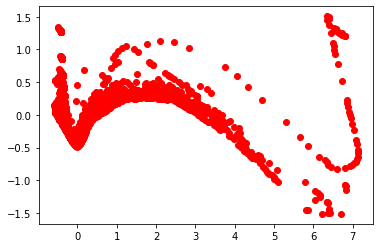

In [215]:
# one.iloc[0].lambda_format(x_f_pysr[:,0], x_f_pysr[:,1])
plt.plot(y_f_pysr[:,0], best0.iloc[0].lambda_format(x_f_pysr)-y_f_pysr[:,0], 'ro')

In [216]:
np.std(best0.iloc[0].lambda_format(x_f_pysr)-y_f_pysr[:,0])

0.3977357

In [217]:
from torch_scatter import scatter
x_g_pysr = scatter(torch.tensor(y_f_pysr, dtype=torch.float64), torch.tensor(b_pysr, dtype=torch.long), dim=0).numpy()

In [229]:
x_g_pysr

array([[ 13.13146617,   1.71073896],
       [ 16.36346722,   3.70199264],
       [ 31.22807716,   2.12067875],
       [ 29.7516233 ,  11.06550348],
       [ 74.97590502,  16.38468307],
       [194.59231759,  60.84593654],
       [ 18.23269489,   1.66263188],
       [ 15.84513435,   2.84710234],
       [ 21.0803826 ,   3.31253643],
       [398.21547388, 321.13858598],
       [ 33.51598039,   3.3842438 ],
       [ 17.30510584,   1.73565925],
       [ 38.18335607,   6.74572349],
       [ 39.18332683,   8.46629339],
       [ 23.68732862,   1.96750927],
       [ 43.71540507,   5.99577419],
       [ 23.61704589,   5.05563699],
       [ 42.74021224,   6.64703679],
       [194.18906025,  53.19426269],
       [ 21.11458188,   4.04913563],
       [ 47.28940162,   9.35568804],
       [ 24.72956762,   2.51916661],
       [ 61.29878788,  12.83527662],
       [ 72.64128599,  12.80809904],
       [ 76.61591325,  15.22444393]])

In [220]:
y_i_equations = pysr(
    X=x_g_pysr, y=y_g_pysr,
    procs=4,
    niterations=10,
    populations=12,
    useFrequency=True,
    multithreading=True, 
    binary_operators=["plus", "sub", "mult", "div"],
    unary_operators = ['log10_abs', 'neg', 'sqrt_abs'],
    batching=1, 
    batchSize=250,
    maxsize=10
)

Running on julia -O3 --threads 4 /var/folders/7n/5d661fr13pz2l_3q38y38nz80000gn/T/tmpcux4nyze/runfile.jl
Started!

Cycles per second: 8.970e+03
Head worker occupation: 16.1%
Progress: 2 / 120 total iterations (1.667%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           2.338e-01  -0.000e+00  -1.582534
4           3.071e-02  6.765e-01  (-2.4265583 + log10_abs(x1))
5           2.446e-02  2.277e-01  (-1.9300588 + (0.005522433 * x0))
7           9.834e-03  4.555e-01  neg(2.0576873 + (-0.13985461 * sqrt_abs(x1)))

Press 'q' and then <enter> to stop execution early.

Cycles per second: 1.150e+04
Head worker occupation: 8.1%
Progress: 5 / 120 total iterations (4.167%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           2.338e-01  -0.000e+00  -1.582534
4           3.071e-02  6.765e-01  (-2.4265583 + log10_abs(x1))
5           2.446e-02  2.277e-01  (-1.9300588 + (0.005522433 * x0)


Cycles per second: 1.030e+04
Head worker occupation: 1.1%
Progress: 42 / 120 total iterations (35.000%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           2.338e-01  -0.000e+00  -1.582534
4           3.071e-02  6.765e-01  (-2.4265583 + log10_abs(x1))
5           2.446e-02  2.277e-01  (-1.9300588 + (0.005522433 * x0))
7           9.834e-03  4.555e-01  neg(2.0576873 + (-0.13985461 * sqrt_abs(x1)))

Press 'q' and then <enter> to stop execution early.

Cycles per second: 1.110e+04
Head worker occupation: 1.1%
Progress: 46 / 120 total iterations (38.333%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           2.338e-01  -0.000e+00  -1.582534
4           3.071e-02  6.765e-01  (-2.4265583 + log10_abs(x1))
5           2.446e-02  2.277e-01  (-1.9300588 + (0.005522433 * x0))
7           9.834e-03  4.555e-01  neg(2.0576873 + (-0.13985461 * sqrt_abs(x1)))

Press 'q' and then <enter> t


Cycles per second: 9.770e+03
Head worker occupation: 0.6%
Progress: 81 / 120 total iterations (67.500%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           2.338e-01  -0.000e+00  -1.582534
4           3.071e-02  6.765e-01  (-2.4265583 + log10_abs(x1))
5           2.446e-02  2.277e-01  (-1.9300588 + (0.005522433 * x0))
7           9.834e-03  4.555e-01  neg(2.0576873 + (-0.13985461 * sqrt_abs(x1)))

Press 'q' and then <enter> to stop execution early.

Cycles per second: 1.050e+04
Head worker occupation: 0.6%
Progress: 85 / 120 total iterations (70.833%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           2.338e-01  -0.000e+00  -1.582534
4           3.071e-02  6.765e-01  (-2.4265583 + log10_abs(x1))
5           2.446e-02  2.277e-01  (-1.9300588 + (0.005522433 * x0))
7           9.834e-03  4.555e-01  neg(2.0576873 + (-0.13985461 * sqrt_abs(x1)))

Press 'q' and then <enter> t

In [259]:
# best(y_i_equations)

0.17524268886318767

In [287]:
def emulated_model(x, batch_x):
    global x_fs, x_gs
    x_fs = f(x)
    x_gs = scatter(torch.tensor(x_fs, dtype=torch.float64), torch.tensor(batch_x, dtype=torch.long), dim=0).numpy()[25:]
    
    return g(x_gs)

def g(x):
    return np.log10(0.00374491271687132*abs(x[:,1]))

def f(x):
    return np.vstack([0.3996181*x[:,1]**2, x[:,1]*(x[:,1] + 0.47631466) - 0.4742815]).T

In [288]:
scatter(torch.tensor(x_fs, dtype=torch.float64), torch.tensor(batch_test, dtype=torch.long), dim=0).numpy()

array([[  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [ 15.24004841,  19.90861765],
       [481.81057486, 728.89593437],
 

In [289]:
N=25
N2=50
vals, counts = np.unique(batch[0], return_counts=1)
l = np.cumsum(counts)[N-1]
l2 =np.cumsum(counts)[N2-1]
x_test=np.vstack(x_f[0][l:l2])
y_test=np.vstack(y_t[0][N:N2])

batch_test = batch[0][l:l2]

In [299]:
np.std(emulated_model(x_test, batch_test)-y_test.T), np.mean(emulated_model(x_test, batch_test)-y_test.T)

(0.5892224111274792, 0.5912676453359345)

In [294]:
y_t[0][N:N2]

array([-1.9772418 ,  1.3415691 , -1.5322232 , -0.51122093, -2.130486  ,
       -1.2651266 , -2.2358088 , -0.02926643, -1.8143276 , -2.4454358 ,
       -0.988252  ,  0.31029388, -1.8166134 , -1.6573899 , -2.9183106 ,
       -1.9714491 , -0.75732195, -0.31925666, -1.498775  , -1.0109223 ,
       -0.9976482 , -1.5452405 , -2.293686  , -1.1154006 ,  1.2733115 ],
      dtype=float32)